In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
from sklearn.utils import shuffle
import sklearn
import glob
import cv2
import pdb

In [2]:
#Load data function used combination data from GTI and KITTI
def loadData():
    images=glob.glob('./vehicles/vehicles/GTI_Far/image*.png')
    train_car=[]    
    train_not_car=[]
#     all data was read using cv2.imread() to avoid diffrent imge format

    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)    
        train_car.append(img)
        
    images=glob.glob('./vehicles/vehicles/GTI_Left/image*.png')
    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  
        train_car.append(img)
        
    images=glob.glob('./vehicles/vehicles/GTI_Right/image*.png')

    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_car.append(img)
        

    images=glob.glob('./vehicles/vehicles/MiddleClose/image*.png')
    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_car.append(img)
        

    images=glob.glob('./vehicles/vehicles/KITTI_extracted/*.png')
    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_car.append(img)
        


    images=glob.glob('./non-vehicles/non-vehicles/GTI/image*.png')
    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_not_car.append(img)
        

    images=glob.glob('./non-vehicles/non-vehicles/Extras/extra*.png')
    for fname in images:
        img=cv2.imread(fname)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        train_not_car.append(img)
      

   
    return (train_car,train_not_car)


In [3]:
from mpl_toolkits.mplot3d import Axes3D
# this function to draw color space in 3D
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulatio

In [4]:
def bin_spatial(img, size=(16,16)):
    # binning spatial feature with size (16X16) to reduce computation
    features=[]    
    features .append(cv2.resize(img,size).ravel()) 
    return features
    # Return the feature vector
   

In [5]:
import numpy as np
def HistofClolor(img,nbins=32, bins_range=(0, 256)):
#     Color feature histogram
    hist_features=[]
    hhist=np.histogram(img[:,:,0], bins=32, range=(0, 255))
    shist=np.histogram(img[:,:,1], bins=32, range=(0, 255))
    vhist=np.histogram(img[:,:,2], bins=32, range=(0, 255))
    hist_features.append(np.concatenate((hhist[0], shist[0], vhist[0]))) #concatinate color features    
    return hist_features   
    

In [6]:
def get_hog_features(imgo, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False):
    
#     extracting Hog feature from gray scal image (for single channel) to reduce computation
# the commetted lines for extracting Hog for 3 three channels
    features_data = []
    if vis == True:
        img=cv2.cvtColor(imgo,cv2.COLOR_RGB2GRAY)  #conver to gray
#         ch_0=img[:,:,0]
#         ch_1=img[:,:,1]
#         ch_2=img[:,:,2]
        
#         plt.imshow(img)
#         plt.show()

        # Use skimage.hog() to get both features and a visualization
        features_0, imagehog = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell)
                                  , cells_per_block=(cell_per_block, cell_per_block),
                                  visualise=True, feature_vector=False,transform_sqrt=True )
#         plt.title('sample HOG')
#         plt.imshow(imagehog)
#         plt.savefig('./output_images/hog_sample.png')
#         plt.show()


#         features_1, imagehog = hog(ch_1, orientations=orient,
#                                   pixels_per_cell=(pix_per_cell, pix_per_cell)
#                                   , cells_per_block=(cell_per_block, cell_per_block),
#                                   visualise=True, feature_vector=False)
# #         plt.imshow(imagehog)
# #         plt.show()
# #         

#         features_2, imagehog = hog(ch_2, orientations=orient,
#                                   pixels_per_cell=(pix_per_cell, pix_per_cell)
#                                   , cells_per_block=(cell_per_block, cell_per_block),
#                                   visualise=True, feature_vector=False)
#         plt.imshow(imagehog)
#         plt.show()
        
        features_0=features_0.reshape(-1)  # reshape feature vector
#         features_1=features_1.reshape(-1)
#         features_2=features_2.reshape(-1)
        

#         features_data.append(np.concatenate((features_0,features_1,features_2)))
        features_data.append(features_0)  # appending Hog features

        
        return features_data


    else:      
        # Use skimage.hog() to get features only
        features = [] # Remove this line
        return features_data

In [7]:
# all features extraction

def extractFeature(data, color_space='HSV', size=(32, 32)):

#     Hog parameter
    orient = 9
    pix_per_cell = 8
    cell_per_block = 4
    
    
    file_features=[]  # concatinated features per image
  
    features=[]   # all features data
    feature_hog=[]  #Hog features
    spatial_size=(16,16)  #spatial binned size
#     HSV_data=[]
    count=0
    for i in data:
       
        
        img_YCrCb = cv2.cvtColor(i, cv2.COLOR_RGB2YCrCb)  #convert image to YCrCb
 #         pdb.set_trace()
        spatial_features=bin_spatial(img_YCrCb, size=spatial_size)  #extract spatial features
#         pdb.set_trace()
        hist_features=HistofClolor(img_YCrCb,nbins=32, bins_range=(0, 256))  #extract histogram features
        feature_hog=get_hog_features(i, orient,                             #extract Hog features
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
        feature_hog=np.reshape(feature_hog,(1,-1))               #reshape Hog features
        file_features=np.concatenate((spatial_features, 
                                      hist_features,feature_hog),1)  #concatenate features image
        features.append(np.concatenate(file_features))  #append features image
    
    
    return features
    


In [8]:
import pdb

car,not_cor=loadData()  # load data
sc=car[0:4000]          #select 4000 car sample
snc=not_cor[0:4000]     #select 4000 not car sample
# plt.title('sample car')
# plt.imshow(sc[0])
# plt.savefig('./output_images/sample_car.png')
# plt.show()
# plt.title('sample not car')
# plt.imshow(snc[0])
# plt.savefig('./output_images/sample_not_car.png')
# plt.show()
#pdb.set_trace()


In [9]:
car_features=extractFeature(                     #extract car features
    sc, color_space='YCrCb', size=(32, 32))
#pdb.set_trace()
not_car_features=extractFeature(                 #extract not car features
    snc, color_space='YCrCb', size=(32, 32))

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [10]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm, grid_search, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import time

# Create an array stack, NOTE: StandardScaler() expects np.float64

X = np.vstack((car_features, not_car_features)).astype(np.float64)  # stack features 

from sklearn.preprocessing import  StandardScaler
# Fit a per-column scaler
X_scaler = StandardScaler(copy = False).fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)    #Normalise data
spatial=32
histbin=32
y = np.hstack((np.ones(len(car_features)), np.zeros(len(not_car_features))))   #create lable array
rand_state = np.random.randint(0, 1000)
X_train, X_test, y_train, y_test = train_test_split(                           #split data to train and test 40%
    scaled_X, y, test_size=0.4, random_state=rand_state)
X_train, y_train = shuffle(X_train, y_train)

print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))

parameters = {'kernel':['linear'], 'C':[100]}
# svc = svm.SVC()
# gs = GridSearchCV(svc, parameters,cv=2,n_jobs=4,verbose=3,)         #GridsearchCV was very slow
# gs.fit(X_train, y_train)

# aGrid = aML_GS.GridSearchCV( aClassifierOBJECT, param_grid = aGrid_of_parameters,
#                             cv = cv, n_jobs = n_JobsOnMultiCpuCores, verbose = 5 )


# # Use a linear SVC 
svc = LinearSVC()     #create classifier
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)     #fit train data
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))  #predict test data
# Check the prediction time for a single sample
t=time.time()
n_predict = len(X_test)
# print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
# print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Using spatial binning of: 32 and 32 histogram bins
Feature vector length: 4464
1.72 Seconds to train SVC...
Test Accuracy of SVC =  0.9772
9e-05 Seconds to predict 3200 labels with SVC


In [11]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    draw_img = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img

In [12]:
def windowex(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
#     pdb.set_trace()
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    #print(window_list[0].shape)
    #finalimage=draw_boxes(img,window_list)
    # Return the list of windows
#     print (len(window_list))
    return window_list


In [13]:
from sklearn.preprocessing import  StandardScaler
def searchwindow(img,ws):    #predict windows

    on_windows=[]
 
    li=[]
    for window in ws:
        test_img = cv2.resize(img[window[0][1]:window[1][1], 
                                  window[0][0]:window[1][0]], (64, 64))   #extract window     
        li.append(test_img)        #I send window in list as feature extraction funtion accept list of images
        features=extractFeature(li, color_space='RGB', size=(32, 32))    #extract features window
#         print(features[0].shape)

        test_features = X_scaler.transform(np.array(features).reshape(1, -1))  #normalise features
        prediction = svc.predict(test_features)                                #predict window
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)          #if car append in on windows
        del li[:]

    return on_windows
    
    

In [14]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [15]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [16]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img



In [17]:
def findcont(img):   #find contours in heat map and dilate them to group closed high heats
    
    windows=[]       
    img=img.astype(np.uint8)   #conver Image to int numpy
    kernel = np.ones((15,15), np.uint8)
    img_dilation = cv2.dilate(img, kernel, iterations=1)     #delate window with kernel
#     plt.title('Sample dilated')
#     plt.imshow(img_dilation)
#     plt.savefig('./output_images/dilated_I.png')
#     plt.show()
    im2, cnts, hierarchy = cv2.findContours(img_dilation.copy(), 
                                            cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #find contours
#     cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:3]
    cari = None
    
    for c in cnts:              #obtain four point window to be drawn       
        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(img, (x-20,y-20), (x+w,y+h), (255, 0, 0), 2)
        w=((x,y),(x+w,y+h))
        windows.append(w)

    return windows    

In [18]:
import Lane          # Lane detection piplne

def laneDetection(img,f):
    
    orgImg=img
    roiGray=region_of_interest(f)
    gray =cv2.cvtColor(f,cv2.COLOR_RGB2GRAY)
    blured=blur_image(gray)
    sbTH= SobelThr(blured,d)
    sbTH=region_of_interest(sbTH)
    bsTH= STHR(orgImg,d)
    bsTH=blur_image(bsTH)
    comI=combinI(sbTH,bsTH,d) 
    roib=region_of_interest(comI)
    undistI=undistresult(comI, mtx,dist)
    pI, pM=prespectI(undistI)  
    Minv = np.linalg.inv(pM)
    [left_fit, ploty,right_fit,lc, rc, offset]= LineFitting(pI,d)
    uW=unwrappedframe(orgImg,pI,Minv,left_fit, ploty,right_fit)
    uW=cv2.putText(uW,'Curvature left: %.1f m'%lc,(50,50), 
                        font, 1,(255,255,255),2,cv2.LINE_AA)
    uW=cv2.putText(uW,'Curvature right: %.1f m'%rc,(50,100),
                   font, 1,(255,255,255),2,cv2.LINE_AA)
    uW=cv2.putText(uW,'Center car offset: %.1f m'%offset,(50,150),
                   font, 1,(255,255,255),2,cv2.LINE_AA)
    return uW
    

In [25]:
from moviepy.editor import *
from moviepy.editor import VideoFileClip
from moviepy.video.VideoClip import VideoClip
import moviepy
import matplotlib as mpimg
import time
from moviepy.Clip import Clip
from scipy.ndimage.measurements import label
from Lane import *
import scipy.misc



clip = VideoFileClip('project_video.mp4') # Read clip
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')      #OpenCv writing file
out = cv2.VideoWriter('out_video2.avi',fourcc, 15.0, (640, 360)) # intialise output file

frameClibration= clip.get_frame(0)

plt.title("Frame1")
im=scipy.misc.imresize(frameClibration, (180, 320,3))


[ret, mtx, dist, rvecs,tvecs] =undistorT(frameClibration)   #Undistort frame -calibration
rdist=undistresult(frameClibration, mtx,dist)

#im=scipy.misc.imresize(rdist, (180, 320,3))
font = cv2.FONT_HERSHEY_SIMPLEX

d=0      # Frame number
# hot_windows=[]
for frame in clip.iter_frames(dtype=np.uint8):
    
        
    imageX=frame

    heat = np.zeros_like(frame[:,:,0]).astype(np.float) # create heat map
    t=time.time()

#extract multiscale windows
    windows=windowex(imageX,x_start_stop=[800, None], y_start_stop=[400, 550]  #extract windows 
                    , xy_window=(90, 90), xy_overlap=(0.8,0.8))

    hot_windows=searchwindow(imageX,windows)

    windows=windowex(imageX,x_start_stop=[650, None], y_start_stop=[400, 680]   #extract windows
                            , xy_window=(128, 128), xy_overlap=(0.2,0.2))

    hot_windows.extend(searchwindow(imageX,windows))

 ##############################################
    heat = add_heat(heat,hot_windows)

#         Apply threshold to help remove false positives
    heat = apply_threshold(heat,4)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

#         w=findcont(heatmap)     # other method for group closed hot peaks  
    labels = label(heatmap)
    draw_img2=draw_labeled_bboxes(np.copy(frame),labels)

#         fig = plt.figure()
#         plt.subplot(121)
#         plt.imshow(draw_img2)
#         plt.title('Car Positions2')
#         plt.subplot(122)
#         plt.imshow(heatmap, cmap='hot')
#         plt.title('Heat Map')
#         fig.tight_layout()
#         plt.savefig('./output_images/Detected_cars.png')
#         plt.show()



    final_image=laneDetection(draw_img2,frame)   # detect lanes
    t2 = time.time()
    tf=t2-t
    final_image=cv2.putText(final_image,'time per frame: %.1f m'%tf,(50,200),
                   font, 1,(255,255,255),2,cv2.LINE_AA)

#     plt.imshow(final_image)
# #     plt.savefig('./output_images/result.png')
#     plt.show()

    f=cv2.resize(final_image,(640,360))    #resize frame to reduce video file size 

    out.write(f)


    print('Process time per frame',d,':..',round(t2-t, 5))
#     print (d)
    d=d+1
out.release()
    

Process time per frame 0 :.. 3.33772
Process time per frame 1 :.. 3.37182
Process time per frame 2 :.. 3.39595
Process time per frame 3 :.. 3.41143
Process time per frame 4 :.. 3.36562
Process time per frame 5 :.. 3.3824
Process time per frame 6 :.. 3.35243
Process time per frame 7 :.. 3.40861
Process time per frame 8 :.. 3.36761
Process time per frame 9 :.. 3.38649
Process time per frame 10 :.. 3.36293
Process time per frame 11 :.. 3.34237
Process time per frame 12 :.. 3.72998
Process time per frame 13 :.. 3.39545
Process time per frame 14 :.. 3.37006
Process time per frame 15 :.. 3.34497
Process time per frame 16 :.. 3.38533
Process time per frame 17 :.. 3.34878
Process time per frame 18 :.. 3.35049
Process time per frame 19 :.. 3.34265
Process time per frame 20 :.. 3.36542
Process time per frame 21 :.. 3.36916
Process time per frame 22 :.. 3.35671
Process time per frame 23 :.. 3.34767
Process time per frame 24 :.. 3.33652
Process time per frame 25 :.. 3.35694
Process time per frame 

Process time per frame 214 :.. 3.35496
Process time per frame 215 :.. 3.30925
Process time per frame 216 :.. 3.36792
Process time per frame 217 :.. 3.34834
Process time per frame 218 :.. 3.3575
Process time per frame 219 :.. 3.30294
Process time per frame 220 :.. 3.3257
Process time per frame 221 :.. 3.31888
Process time per frame 222 :.. 3.33231
Process time per frame 223 :.. 3.3425
Process time per frame 224 :.. 3.37267
Process time per frame 225 :.. 3.29696
Process time per frame 226 :.. 3.35043
Process time per frame 227 :.. 3.34426
Process time per frame 228 :.. 3.35322
Process time per frame 229 :.. 3.30057
Process time per frame 230 :.. 3.352
Process time per frame 231 :.. 3.32678
Process time per frame 232 :.. 3.35083
Process time per frame 233 :.. 3.30568
Process time per frame 234 :.. 3.31154
Process time per frame 235 :.. 3.39728
Process time per frame 236 :.. 3.32784
Process time per frame 237 :.. 3.32444
Process time per frame 238 :.. 3.37786
Process time per frame 239 :..

Process time per frame 425 :.. 3.34695
Process time per frame 426 :.. 3.33118
Process time per frame 427 :.. 3.35374
Process time per frame 428 :.. 3.27729
Process time per frame 429 :.. 3.32478
Process time per frame 430 :.. 3.29187
Process time per frame 431 :.. 3.35737
Process time per frame 432 :.. 3.32181
Process time per frame 433 :.. 3.33602
Process time per frame 434 :.. 3.35742
Process time per frame 435 :.. 3.3359
Process time per frame 436 :.. 3.30039
Process time per frame 437 :.. 3.35725
Process time per frame 438 :.. 3.33899
Process time per frame 439 :.. 3.32299
Process time per frame 440 :.. 3.28847
Process time per frame 441 :.. 3.28374
Process time per frame 442 :.. 3.31605
Process time per frame 443 :.. 3.33949
Process time per frame 444 :.. 3.28467
Process time per frame 445 :.. 3.30111
Process time per frame 446 :.. 3.3251
Process time per frame 447 :.. 3.33538
Process time per frame 448 :.. 3.28819
Process time per frame 449 :.. 3.32661
Process time per frame 450 

Process time per frame 636 :.. 3.36852
Process time per frame 637 :.. 3.33607
Process time per frame 638 :.. 3.33784
Process time per frame 639 :.. 3.32153
Process time per frame 640 :.. 3.30611
Process time per frame 641 :.. 3.31013
Process time per frame 642 :.. 3.37271
Process time per frame 643 :.. 3.30347
Process time per frame 644 :.. 3.37402
Process time per frame 645 :.. 3.32985
Process time per frame 646 :.. 3.32658
Process time per frame 647 :.. 3.3337
Process time per frame 648 :.. 3.33757
Process time per frame 649 :.. 3.34697
Process time per frame 650 :.. 3.34145
Process time per frame 651 :.. 3.339
Process time per frame 652 :.. 3.33823
Process time per frame 653 :.. 3.31672
Process time per frame 654 :.. 3.33895
Process time per frame 655 :.. 3.34548
Process time per frame 656 :.. 3.29167
Process time per frame 657 :.. 3.31632
Process time per frame 658 :.. 3.34911
Process time per frame 659 :.. 3.34486
Process time per frame 660 :.. 3.35453
Process time per frame 661 :

Process time per frame 847 :.. 3.31165
Process time per frame 848 :.. 3.32278
Process time per frame 849 :.. 3.37102
Process time per frame 850 :.. 3.30155
Process time per frame 851 :.. 3.34749
Process time per frame 852 :.. 3.33651
Process time per frame 853 :.. 3.32617
Process time per frame 854 :.. 3.2753
Process time per frame 855 :.. 3.3055
Process time per frame 856 :.. 3.33684
Process time per frame 857 :.. 3.30096
Process time per frame 858 :.. 3.32524
Process time per frame 859 :.. 3.33409
Process time per frame 860 :.. 3.34601
Process time per frame 861 :.. 3.36518
Process time per frame 862 :.. 3.31114
Process time per frame 863 :.. 3.29756
Process time per frame 864 :.. 3.31961
Process time per frame 865 :.. 3.35804
Process time per frame 866 :.. 3.41103
Process time per frame 867 :.. 3.33999
Process time per frame 868 :.. 3.31239
Process time per frame 869 :.. 3.31379
Process time per frame 870 :.. 3.37883
Process time per frame 871 :.. 3.2918
Process time per frame 872 :

Process time per frame 1057 :.. 3.3366
Process time per frame 1058 :.. 3.33756
Process time per frame 1059 :.. 3.3224
Process time per frame 1060 :.. 3.34838
Process time per frame 1061 :.. 3.36473
Process time per frame 1062 :.. 3.34156
Process time per frame 1063 :.. 3.37102
Process time per frame 1064 :.. 3.32464
Process time per frame 1065 :.. 3.34264
Process time per frame 1066 :.. 3.31871
Process time per frame 1067 :.. 3.33698
Process time per frame 1068 :.. 3.33786
Process time per frame 1069 :.. 3.35724
Process time per frame 1070 :.. 3.34532
Process time per frame 1071 :.. 3.33434
Process time per frame 1072 :.. 3.42969
Process time per frame 1073 :.. 3.32287
Process time per frame 1074 :.. 3.31079
Process time per frame 1075 :.. 3.32151
Process time per frame 1076 :.. 3.35639
Process time per frame 1077 :.. 3.32771
Process time per frame 1078 :.. 3.37902
Process time per frame 1079 :.. 3.29526
Process time per frame 1080 :.. 3.34469
Process time per frame 1081 :.. 3.33937
Pr

In [ ]:
from IPython.display import HTML
from IPython.display import Image
from IPython import display
from moviepy.editor import VideoFileClip
import os, sys
import moviepy
clip_out='out_video22222_Copy1.avi'

HTML("""
<video width="1280" height="720" controls>
  <source src="{0}" type="video/avi">
</video>
""".format(clip_out))

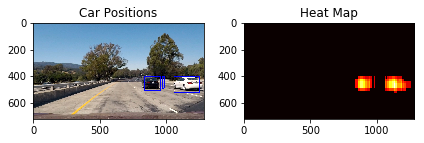

In [50]:


image=cv2.imread('./test_images/test1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
imageX=image
heat = np.zeros_like(image[:,:,0]).astype(np.float) # create heat map
t=time.time()

#extract multiscale windows
windows=windowex(imageX,x_start_stop=[800, None], y_start_stop=[400, 550]  #extract windows 
                , xy_window=(90, 90), xy_overlap=(0.8,0.8))

hot_windows=searchwindow(imageX,windows)

windows=windowex(imageX,x_start_stop=[650, None], y_start_stop=[400, 680]   #extract windows
                        , xy_window=(128, 128), xy_overlap=(0.2,0.2))

hot_windows.extend(searchwindow(imageX,windows))

##############################################
heat = add_heat(heat,hot_windows)

#         Apply threshold to help remove false positives
heat = apply_threshold(heat,3)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)

w=findcont(heatmap)     #group closed hot peaks
labels = label(heatmap)
draw_img2=draw_labeled_bboxes(np.copy(image),labels)    #draw windows

fig = plt.figure()
plt.title('Sample Detection & Heatmap')
plt.subplot(121)
plt.imshow(draw_img2)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.savefig('./output_images/Detected_cars_1.png')
plt.show()


